## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
gave1 = pd.read_csv('data/04/committee1_stats_04a.csv')
gave1['name'] = ['comm1__' + x for x in gave1['name']]
gave1.index = list(gave1['name'].values)

cand = pd.read_csv('data/04/cand_cleaned_04a.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(gave1.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
gave1 = gave1[['name'] + cols]
print(len(gave1))
gave1.head(2)

490


,name,H0AL01089,H0AL05163,H0AL07086,H0AZ01259,H0CA03078,H0CA25170,H0CA27085,H0CA32101,H0CA53180,...,S6VA00093,S8AZ00221,S8MI00372,S8MN00578,S8MS00261,S8MS00287,total,count,distinct,entity_tps
comm1__RRTVMEDIA (for),comm1__RRTVMEDIA (for),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3434106,90,1,['enttp_Organization (not a committee and not ...
comm1__CAMPAIGN SOLUTIONS (for),comm1__CAMPAIGN SOLUTIONS (for),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2759144,136,1,['enttp_Organization (not a committee and not ...


In [3]:
for col in gave1.columns:
    if gave1[col].sum() == 0:
        gave1.drop([col], axis = 1, inplace = True)
        print(col)

H2TX03126


In [4]:
counts = gave1.drop([
    'name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',

], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

301


P60007168    113
P80001571    103
H0NC09187     48
S2KY00012     23
H6NE02125     19
P80000722     18
H0NC03172     18
H8NY15148     16
S8MI00372     15
S0CO00575     15
H8MN05239     14
P00006486     13
H0PA12181     12
S4CO00395     11
H2AZ07070     11
S6ME00159     11
H8NM01331     10
H8MI13250     10
S8AZ00221     10
H2NY13096     10
dtype: int64

In [5]:
counts_dict = dict(zip(counts.index, counts.values))

cand['comm1_ct'] = [counts_dict[x] if x in counts_dict.keys() else 0 for x in cand['cand_id']]

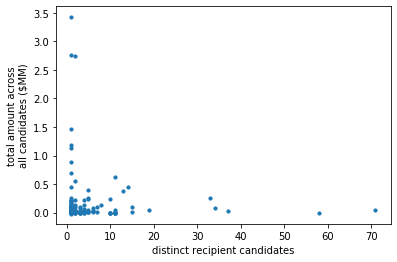

In [6]:
plt.figure()

plt.scatter(
    gave1['distinct'], 
    gave1['total']/1.0E6, 
    s = 10,
)
plt.xlabel('distinct recipient candidates')
plt.ylabel('total amount across\nall candidates ($MM)')
plt.show();

In [7]:
std_tot = gave1['total'].std()
med_tot = gave1['total'].median()

std_dist = gave1['distinct'].std()
med_dist = gave1['distinct'].median()

gave1_new = gave1[
    (gave1['total'] > 1.*med_tot + 0.*std_tot) & \
    (gave1['distinct'] > 1.*med_dist + 0.*std_dist)
]

len(gave1_new)

68

In [8]:
gave1_new['distinct'].value_counts().sort_index()

2     27
3      9
4      6
5      6
6      5
7      2
8      1
10     1
11     3
13     1
14     1
15     1
19     1
33     1
34     1
37     1
71     1
Name: distinct, dtype: int64

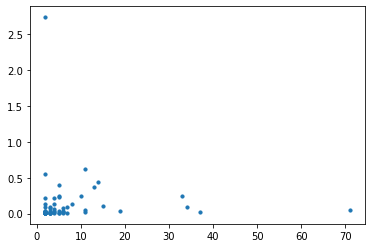

In [9]:
plt.figure()

plt.scatter(
    gave1_new['distinct'], 
    gave1_new['total']/1.0E6, 
    s = 10,
)
plt.show();

In [10]:
rows = []
for comm in list(gave1_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(gave1_new['name'].values), 
)

rows.head()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__AMPLIFY MEDIA (against),2741090.0,2,0.0,0,0.0,0
comm1__CONNELL DONATELLI (for),616263.0,11,0.0,0,0.0,0
comm1__CHONG AND KOSTER (against),547901.0,2,0.0,0,0.0,0
comm1__RIGHT COUNTRY LISTS (for),442673.0,14,0.0,0,0.0,0
comm1__HARRIS MEDIA (against),0.0,0,402000.0,5,0.0,0


In [11]:
cand.loc[cand['comm1__NEBO MEDIA (against)'] > 0, [
    'cand_id',
    'cand_name',
    'contest',
    'comm1__NEBO MEDIA (against)',
]]

,cand_id,cand_name,contest,comm1__NEBO MEDIA (against)
1530,S4MI00355,"PETERS, GARY",MI_senate,879294.0


In [12]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_index()

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm1__ADVANCED MICRO TARGETING (for),6900.0,1,10800.0,1,0.0,0
comm1__ATLANTIC MEDIA AND RESEARCH (against),2500.0,1,5000.0,1,0.0,0
comm1__BUTTON PUSHER PRODUCTIONS (for),39500.0,1,49000.0,2,0.0,0
comm1__CLUB FOR GROWTH (against),13963.0,5,3072.0,6,0.0,0
comm1__FACEBOOK (against),93345.0,5,1500.0,1,50.0,1
comm1__FACEBOOK (for),9912.0,4,171.0,2,909.0,1
comm1__GOOGLE (against),9246.0,2,700.0,2,0.0,0
comm1__GOOGLE (for),18948.0,1,207.0,1,0.0,0
comm1__TAMPA MEDIA (for),142500.0,17,104700.0,16,0.0,0
comm1__TARGET ENTERPRISES (against),107600.0,3,27910.0,1,0.0,0


In [13]:
cand.loc[
    (cand['comm1__FACEBOOK (against)'] > 0) | \
    (cand['comm1__FACEBOOK (for)'] > 0), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__FACEBOOK (for)',
        'comm1__FACEBOOK (against)',
]].sort_values(['comm1__FACEBOOK (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__FACEBOOK (for),comm1__FACEBOOK (against)
454,H0NC09187,"BISHOP, JAMES DANIEL",NC_09,Republican,O,6296.0,500.0
1383,P80001571,"TRUMP, DONALD J.",00_00,Republican,I,3000.0,9015.0
1237,H8MN05239,"OMAR, ILHAN",MN_05,Third party,I,909.0,50.0
1521,S2TX00106,"CORNYN, JOHN SEN",TX_senate,Republican,I,610.0,0.0
1380,P60007168,"SANDERS, BERNARD",00_00,Democrat,C,118.0,0.0
1374,P00010298,"BUTTIGIEG, PETE",00_00,Democrat,C,53.0,0.0
863,H2CA02142,"LAMALFA, DOUG",CA_01,Republican,I,6.0,0.0
1020,H4WA05077,"MCMORRIS RODGERS, CATHY",WA_05,Republican,I,0.0,286.0
1360,H8VA10106,"WEXTON, JENNIFER",VA_10,Democrat,I,0.0,1500.0
1519,S2KY00012,"MCCONNELL, MITCH",KY_senate,Republican,I,0.0,80939.0


In [14]:
cand.loc[
    (cand['comm1__GOOGLE (against)'] > 0) | \
    (cand['comm1__GOOGLE (for)'] > 0), [
        'cand_id',
        'cand_name',
        'contest',
        'cand_pty_affiliation',
        'cand_ici',
        'comm1__GOOGLE (for)',
        'comm1__GOOGLE (against)',
]].sort_values(['comm1__GOOGLE (for)'], ascending = False)

,cand_id,cand_name,contest,cand_pty_affiliation,cand_ici,comm1__GOOGLE (for),comm1__GOOGLE (against)
1383,P80001571,"TRUMP, DONALD J.",00_00,Republican,I,18948.0,1868.0
1374,P00010298,"BUTTIGIEG, PETE",00_00,Democrat,C,207.0,0.0
1519,S2KY00012,"MCCONNELL, MITCH",KY_senate,Republican,I,0.0,7378.0
1530,S4MI00355,"PETERS, GARY",MI_senate,Democrat,I,0.0,350.0
1552,S8MN00578,"SMITH, TINA",MN_senate,Democrat,O,0.0,350.0


In [15]:
gave1_newest = pd.concat([gave1_new, rows], axis = 1)
gave1_newest['name'] = [x.replace('comm1__', '') for x in gave1_newest['name']]
gave1_newest.reset_index(drop = True, inplace = True)
gave1_newest['r_amt:total'] = gave1_newest['r_amt']/(gave1_newest['r_amt'] + gave1_newest['d_amt'])
gave1_newest['r_count:total'] = gave1_newest['r_count']/(gave1_newest['r_count'] + gave1_newest['d_count'])
print(len(gave1_newest))
gave1_newest.head()

68


,name,H0AL01089,H0AL05163,H0AL07086,H0AZ01259,H0CA03078,H0CA25170,H0CA27085,H0CA32101,H0CA53180,...,distinct,entity_tps,r_amt,r_count,d_amt,d_count,t_amt,t_count,r_amt:total,r_count:total
0,AMPLIFY MEDIA (against),0,0,0,0,0,0,0,0,0,...,2,['enttp_Organization (not a committee and not ...,2741090.0,2,0.0,0,0.0,0,1.0,1.0
1,CONNELL DONATELLI (for),0,0,0,0,0,0,0,0,0,...,11,['enttp_Organization (not a committee and not ...,616263.0,11,0.0,0,0.0,0,1.0,1.0
2,CHONG AND KOSTER (against),0,0,0,0,0,0,0,0,0,...,2,['enttp_Organization (not a committee and not ...,547901.0,2,0.0,0,0.0,0,1.0,1.0
3,RIGHT COUNTRY LISTS (for),0,0,0,0,0,0,0,0,0,...,14,['enttp_Organization (not a committee and not ...,442673.0,14,0.0,0,0.0,0,1.0,1.0
4,HARRIS MEDIA (against),0,0,0,0,0,0,0,0,0,...,5,['enttp_Organization (not a committee and not ...,0.0,0,402000.0,5,0.0,0,0.0,0.0


In [16]:
gave1_newest.to_csv('data/04/committee1_stats_04bI.csv', index = False)

In [17]:
# get subset of column names containing 'comm1__'
comms = [x for x in cand.columns if 'comm1__' in x]

# remove the 'comm1__'
comms = [x.replace('comm1__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(gave1_newest['name'])]

# add the 'comm1__' back on
comms = ['comm1__' + x for x in comms]

# get the non-'comm1__' columns
notcomm_cols = [x for x in cand.columns if 'comm1__' not in x]

# non-'comm1__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm1__' and non-'comm1__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm1__TALENTWAVE (for),comm1__ATLANTIC MEDIA AND RESEARCH (against),comm1__FORTHRIGHT STRATEGY (for),comm1__GO RIGHT STRATEGIES (for),comm1__RICHARD SALES MEDIA (for),comm1__HARVEY JAALIN (against),comm1__MINUTEMAN PRESS (for),comm1__VALTIM (against),comm1__RIGHT WAY MEDIA (against),comm1__PLANNED PARENTHOOD OF ORANGE AND SAN BERNARDINO COUNTIES ACTION FUND (for)
0,H0AL01055,"CARL, JERRY LEE, JR",O,Republican,964209.10,0.0,271256.93,0.0,0.0,692952.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",O,Republican,175564.96,0.0,98678.13,0.0,0.0,76886.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


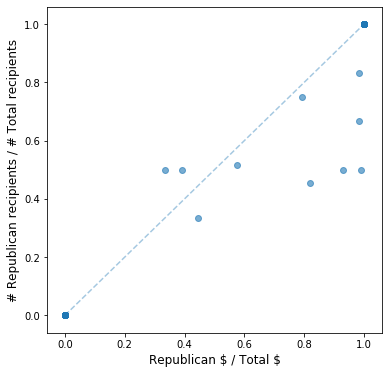

In [18]:
plt.figure(figsize = (6, 6))
plt.scatter(
    gave1_newest['r_amt:total'], 
    gave1_newest['r_count:total'], 
    alpha = 0.6, 
    
)
plt.plot(
    [0, max(gave1_newest['r_amt:total'].max(), gave1_newest['r_count:total'].max())], 
    [0, max(gave1_newest['r_amt:total'].max(), gave1_newest['r_count:total'].max())], 
    ls = '--',
    alpha = 0.4,
    
)
plt.xlabel('Republican \$ / Total \$', fontsize = 12)
plt.ylabel('# Republican recipients / # Total recipients', fontsize = 12)
plt.show();

In [19]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = gave1_newest.loc[gave1_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

proportion to R: 0 

                                                 name   total
4                              HARRIS MEDIA (against)  402000
12                         AISLE 518 STRATEGIES (for)  139098
14                                  CAVALRY (against)  128000
22  GREENBERG QUINLAN ROSNER RESEARCH (coord pty exp)   69905
24                                 RUMBLEUP (against)   49000
25   AMERICAN BRIDGE 21ST CENTURY PAC (coord pty exp)   40000
26                        MOTHERSHIP STRATEGIES (for)   38386
27                           FEIGL-DING ERIC DR (for)   38272
32                        PINPOINT WEBSOLUTIONS (for)   27182
34                        CONNELL DONATELLI (against)   26025
35                            NP STRATEGY GROUP (for)   23371
36                          TIGEREYE PROMOTIONS (for)   23330
44                      APEX STRATEGY GROUP (against)   13783
52                      GO RIGHT STRATEGIES (against)   10400
57                                      TATANGO (

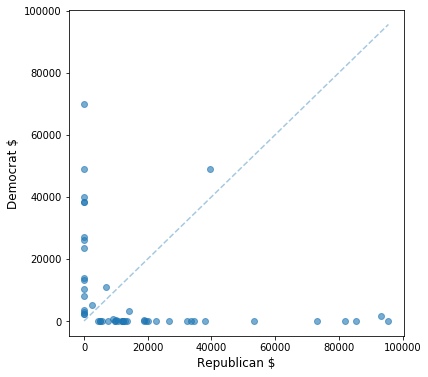

In [20]:
plt.figure(figsize = (6, 6))
gave1_lessmil = gave1_newest[~((gave1_newest['r_amt'] > 1.0E5) | (gave1_newest['d_amt'] > 1.0E5))]

plt.scatter(
    gave1_lessmil['r_amt'], 
    gave1_lessmil['d_amt'],
    alpha = 0.6, 
    
)
plt.plot(
    [0, max(gave1_lessmil['r_amt'].max(), gave1_lessmil['d_amt'].max())], 
    [0, max(gave1_lessmil['r_amt'].max(), gave1_lessmil['d_amt'].max())], 
    ls = '--',
    alpha = 0.4,
    
)
plt.xlabel('Republican \$', fontsize = 12)
plt.ylabel('Democrat \$', fontsize = 12)
plt.show();

In [21]:
# find which committees gave1 proportionately for [against] candidates in both major parties
gave1_lessmil.loc[
    (gave1_lessmil['r_amt:total'] < 0.80) & \
    (gave1_lessmil['r_amt:total'] > 0.20),
    [
        'name',
        'r_amt',
        'r_count',
        'd_amt',
        'd_count',
        'r_amt:total',
        'r_count:total'
    ]
].sort_values(['r_amt'], ascending = False)

,name,r_amt,r_count,d_amt,d_count,r_amt:total,r_count:total
18,BUTTON PUSHER PRODUCTIONS (for),39500.0,1,49000.0,2,0.446328,0.333333
42,ADVANCED MICRO TARGETING (for),6900.0,1,10800.0,1,0.389831,0.500000
59,ATLANTIC MEDIA AND RESEARCH (against),2500.0,1,5000.0,1,0.333333,0.500000


In [22]:
def showcommittee(committee):
    show = cand.loc[cand[committee] > 0, [
        'contest',
        'cand_name',
        'cand_ici',
        'cand_pty_affiliation',
        committee,
    ]].sort_values([committee], ascending = False)
    return show

In [23]:
showcommittee('comm1__BUTTON PUSHER PRODUCTIONS (for)')

,contest,cand_name,cand_ici,cand_pty_affiliation,comm1__BUTTON PUSHER PRODUCTIONS (for)
1048,FL_04,"RUTHERFORD, JOHN",I,Republican,39500.0
878,FL_10,"DEMINGS, VALDEZ VAL",I,Democrat,24500.0
1358,VA_07,"SPANBERGER, ABIGAIL",I,Democrat,24500.0


In [24]:
showcommittee('comm1__ADVANCED MICRO TARGETING (for)')

,contest,cand_name,cand_ici,cand_pty_affiliation,comm1__ADVANCED MICRO TARGETING (for)
1084,NJ_05,"GOTTHEIMER, JOSH",I,Democrat,10800.0
1096,PA_01,"FITZPATRICK, BRIAN",I,Republican,6900.0


In [25]:
showcommittee('comm1__ATLANTIC MEDIA AND RESEARCH (against)')

,contest,cand_name,cand_ici,cand_pty_affiliation,comm1__ATLANTIC MEDIA AND RESEARCH (against)
1133,CA_12,"PELOSI, NANCY",I,Democrat,5000.0
446,NC_03,"MURPHY, GREGORY",I,Republican,2500.0


In [26]:
cand.to_csv('data/04/cand_cleaned_04bI.csv', index = False)